In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
import pylab
import tensorflow as tf
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/

In [2]:
# Form dataset matrix
def create_dataset(dataset, previous=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-previous-1):
		a = dataset[i:(i+previous), 0]
		dataX.append(a)
		dataY.append(dataset[i + previous, 0])
	return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

# load dataset
df = read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
df

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,02/04/2011,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
6,03/04/2011,96,32.85000229,30.30000114,32.10000229,30,34.05000305,30.75000191,32.10000229,28.80000114,...,34.95000076,31.80000114,35.10000229,33.90000153,31.35000038,35.10000229,35.10000229,33.90000153,31.35000038,35.10000229
7,04/04/2011,96,32.25000381,35.40000153,37.34999847,34.35000229,34.95000076,36.45000076,36.15000153,33.15000153,...,32.55000305,31.65000153,32.10000229,31.95000076,29.39999962,30.75,31.95000076,31.35000229,32.70000076,30.75
8,05/04/2011,96,30.90000153,32.85000229,32.10000229,35.55000305,32.55000305,33,31.80000114,31.5,...,33.30000305,32.25,32.70000076,31.95000267,33.30000305,32.85000229,33.45000076,28.35000229,31.80000305,34.65000153
9,06/04/2011,96,32.55000305,30.30000114,33,29.70000076,33.60000229,32.70000076,28.95000076,28.20000076,...,33.75,30,34.80000305,31.50000191,30.60000229,33.45000076,33.00000381,34.04999924,30.90000153,29.10000038


In [4]:
df2=df.rename(columns=df.iloc[0])
df3=df2.drop(df.index[0])
df3
df3.drop(df3.index[0])
df4=df3.drop('Date', axis=1)
df5=df4.drop('Values', axis=1)
df5
df6=df5.dropna()
df7=df6.values
df7
dataset=np.sum(df7, axis=1, dtype=float)
dataset

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

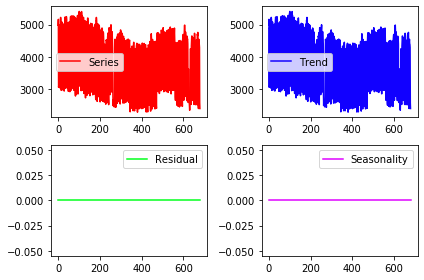

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(dataset, model='additive', freq=1)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(dataset,color='#ff0000', label='Series')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,color='#1100ff', label='Trend')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(223)
plt.plot(residual,color='#00ff1a', label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(224)
plt.plot(seasonal,color='#de00ff', label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

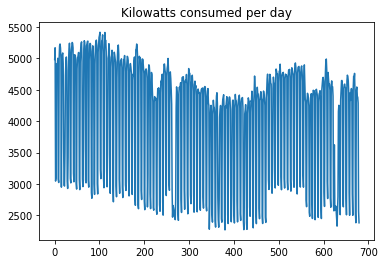

In [6]:
plt.plot(dataset)
plt.title("Kilowatts consumed per day")
plt.show()

std1=np.std(dataset)
mean1=np.mean(dataset)
cv1=std1/mean1 #Coefficient of Variation

from numpy import log
dataset = log(dataset)

std2=np.std(dataset)
mean2=np.mean(dataset)
cv2=std2/mean2 #Coefficient of Variation

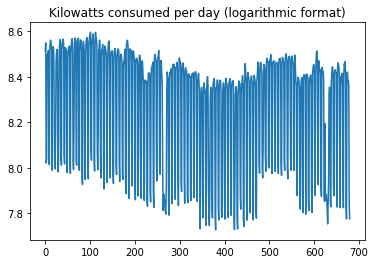

In [7]:
plt.plot(dataset)
plt.title("Kilowatts consumed per day (logarithmic format)")
plt.show()

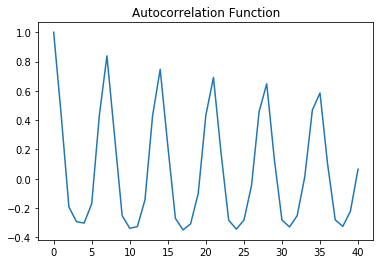

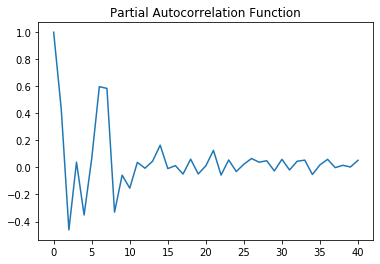

In [8]:
acf=statsmodels.tsa.stattools.acf(dataset)
plt.plot(acf)
plt.title("Autocorrelation Function")
plt.show()
pacf=statsmodels.tsa.stattools.pacf(dataset)
plt.title("Partial Autocorrelation Function")
plt.plot(pacf)
plt.show()

In [9]:
acf

array([ 1.        ,  0.42808878, -0.19280935, -0.29301237, -0.30259718,
       -0.17101404,  0.43177322,  0.83899252,  0.29427303, -0.25180181,
       -0.33843525, -0.32664669, -0.1444946 ,  0.43027552,  0.74685155,
        0.22518231, -0.27038079, -0.34935763, -0.30760163, -0.10012219,
        0.43303004,  0.69135595,  0.17484785, -0.28292073, -0.34373116,
       -0.28366641, -0.04708788,  0.45810191,  0.64804367,  0.13264431,
       -0.28127914, -0.32937746, -0.25244215,  0.01324238,  0.46934001,
        0.58532998,  0.1001038 , -0.28050185, -0.3252559 , -0.22192341,
        0.06519016])

In [10]:
pacf

array([ 1.        ,  0.42871925, -0.46211516,  0.03898332, -0.35168286,
        0.06549668,  0.59728119,  0.5847974 , -0.33057638, -0.0570306 ,
       -0.15317098,  0.03767413, -0.00582917,  0.04603175,  0.1646033 ,
       -0.00846662,  0.0133867 , -0.0491654 ,  0.06125717, -0.04836966,
        0.01215726,  0.12614184, -0.05663957,  0.05529413, -0.03024832,
        0.02394189,  0.06622643,  0.03882276,  0.04956404, -0.02573265,
        0.05996286, -0.01877363,  0.04576842,  0.05409659, -0.05190683,
        0.01915089,  0.05984714, -0.00136104,  0.01567281,  0.00327138,
        0.0528956 ])

In [11]:
# Dickey-Fuller Test
result = adfuller(dataset)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.251146
p-value: 0.017209
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [12]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(dataset)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 


(0.9778863424627504, False)

In [13]:
train, test = dataset[1:594], dataset[595:693]

In [14]:
train

array([8.54997014, 8.02169948, 8.03951221, 8.49874408, 8.48848506,
       8.49801041, 8.51718323, 8.03135286, 8.01418696, 8.5181128 ,
       8.55627932, 8.56154498, 8.54918597, 8.5155018 , 7.98962828,
       8.49368916, 8.52816284, 8.53387334, 8.49984359, 8.18355099,
       8.00019861, 7.99530666, 8.16499397, 8.45979714, 8.50346949,
       8.52119521, 8.47624623, 8.02066491, 7.98243346, 8.13840413,
       8.50705198, 8.54773213, 8.56383824, 8.54268552, 8.03558655,
       8.01215085, 8.52554823, 8.55078273, 8.56615482, 8.56395277,
       8.54938933, 8.06137649, 8.01785142, 8.52834087, 8.52765828,
       8.52679696, 8.51152721, 8.01075796, 7.97915056, 8.48260179,
       8.51877198, 8.52277761, 8.53475806, 8.53549472, 8.02940031,
       7.97585685, 8.5017953 , 8.54417591, 8.56286425, 8.56795288,
       8.50747617, 8.03179166, 7.99231939, 8.17039789, 8.54627619,
       8.57145412, 8.56766768, 8.53189463, 8.02690526, 8.01234968,
       8.55613506, 8.56151629, 8.56889345, 8.5702884 , 8.02509

In [15]:
test

array([7.80425138, 8.41183268, 8.42967259, 8.45083969, 8.45446636,
       8.44085196, 7.96311206, 7.87966991, 8.40626163, 8.47031121,
       8.51016858, 8.51469006, 8.47824444, 8.02043482, 7.92624152,
       8.47104454, 8.44687802, 8.42858053, 8.43141741, 8.409942  ,
       7.92822583, 7.87492922, 8.42595471, 8.44246965, 8.42079242,
       8.42233291, 8.38913252, 7.88551733, 7.85263347, 8.19491967,
       7.85728734, 7.8630744 , 7.88231492, 7.85399309, 7.80791663,
       7.75383812, 7.84795783, 7.93844555, 8.33134542, 8.35514474,
       8.33746826, 7.85029838, 7.82883453, 8.37413081, 8.40682013,
       8.443439  , 8.44386953, 8.40905103, 7.91626049, 7.87739719,
       8.4158247 , 8.4293451 , 8.43141741, 8.42002128, 8.41759383,
       7.92696354, 7.82803803, 8.4422541 , 8.46189188, 8.45733702,
       8.44214632, 8.40155785, 7.96189308, 7.82544503, 8.40032224,
       8.37320734, 8.40782465, 8.4158247 , 8.40804774, 7.95173537,
       7.82484569, 8.41516047, 8.45776161, 8.44644879, 8.46789

In [16]:
# Weekly seasonality - m set to 52
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, start_P=0, m=7, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-734.989, BIC=-713.131, Fit time=4.627 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-485.003, BIC=-476.260, Fit time=0.226 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=-550.457, BIC=-532.971, Fit time=1.079 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-676.471, BIC=-658.985, Fit time=3.321 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=-735.276, BIC=-709.046, Fit time=4.158 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=-728.290, BIC=-706.432, Fit time=4.747 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=-737.137, BIC=-706.536, Fit time=7.269 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=-677.485, BIC=-651.255, Fit time=7.450 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=-728.123, BIC=-693.150, Fit time=8.801 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(0, 1, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=-735.008, BIC=-704.407, Fit time=7.259 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=-757.034, BIC=-717.690, Fit time=11.845 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=-753.249, BIC=-709.533, Fit time=13.697 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=-754.140, BIC=-719.167, Fit time=6.461 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=-752.448, BIC=-717.475, Fit time=9.958 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=-769.030, BIC=-725.313, Fit time=12.404 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=-764.448, BIC=-716.360, Fit time=14.572 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=-762.592, BIC=-723.247, Fit time=7.961 seconds
Total fit time: 176.663 seconds


In [17]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  593
Model:             SARIMAX(3, 1, 3)x(0, 1, 2, 7)   Log Likelihood                 394.515
Date:                           Sat, 24 Aug 2019   AIC                           -769.030
Time:                                   11:57:30   BIC                           -725.313
Sample:                                        0   HQIC                          -751.993
                                           - 593                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.72e-05      0.000     -0.080      0.936      -0.000       0.000
ar.L1         -1.2755      0.046    -27.595      0.000      -1.366      -1.185
ar.L2         -0.4351      0.049     -8.919      0.000      -0.531      -0.339
ar.L3          0.0928      0.033      2.833      0.005       0.029       0.157
ma.L1          0.7089      0.036     19.840      0.000       0.639       0.779
ma.L2         -0.7842      0.029    -27.179      0.000      -0.841      -0.728
ma.L3         -0.8883      0.038    -23.548      0.000      -0.962      -0.814
ma.S.L7       -0.1809      0.035     -5.119      0.000      -0.250      -0.112
ma.S.L14      -0.1345      0.049     -2.745      0.006      -0.231      -0.038
sigma2         0.0148      0.001     24.751      0.000       0.014       0.016
===================================================================================
Ljung-Box (Q):                       67.61   Jarque-Bera (JB):               884.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
test

array([7.80425138, 8.41183268, 8.42967259, 8.45083969, 8.45446636,
       8.44085196, 7.96311206, 7.87966991, 8.40626163, 8.47031121,
       8.51016858, 8.51469006, 8.47824444, 8.02043482, 7.92624152,
       8.47104454, 8.44687802, 8.42858053, 8.43141741, 8.409942  ,
       7.92822583, 7.87492922, 8.42595471, 8.44246965, 8.42079242,
       8.42233291, 8.38913252, 7.88551733, 7.85263347, 8.19491967,
       7.85728734, 7.8630744 , 7.88231492, 7.85399309, 7.80791663,
       7.75383812, 7.84795783, 7.93844555, 8.33134542, 8.35514474,
       8.33746826, 7.85029838, 7.82883453, 8.37413081, 8.40682013,
       8.443439  , 8.44386953, 8.40905103, 7.91626049, 7.87739719,
       8.4158247 , 8.4293451 , 8.43141741, 8.42002128, 8.41759383,
       7.92696354, 7.82803803, 8.4422541 , 8.46189188, 8.45733702,
       8.44214632, 8.40155785, 7.96189308, 7.82544503, 8.40032224,
       8.37320734, 8.40782465, 8.4158247 , 8.40804774, 7.95173537,
       7.82484569, 8.41516047, 8.45776161, 8.44644879, 8.46789

In [19]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=85), index=test)
prediction.columns = ['Predicted_Consumption']

In [20]:
predictions=prediction['Predicted_Consumption']
predictions=np.exp(predictions)
test=np.exp(test)
percentage_error=((predictions-test)/test)
percentage_error=abs(percentage_error)
mean=np.mean(percentage_error)
mean

0.23640753169390996

In [21]:
percentage_error=pd.DataFrame(percentage_error)
below10=percentage_error[percentage_error < 0.10].count()
all=percentage_error.count()
np.sum(below10)

30

In [22]:
np.sum(all)

85